In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# def plot_actual_vs_forecast(data_df):
#     """
#     Plots the actual and forecast data from the given DataFrame.

#     Parameters:
#     data_df (pd.DataFrame): DataFrame containing the actual and forecast data.
#     """
#     # Identify actual and forecast columns
#     actual_columns = [col for col in data_df.columns if not col.startswith('Forecast_')]
#     forecast_columns = [col for col in data_df.columns if col.startswith('Forecast_')]

#     # Remove 'Forecast_' prefix from forecast columns for matching
#     forecast_columns = [col.replace('Forecast_', '') for col in forecast_columns]

#     # Filter only the matching pairs
#     matching_columns = [col for col in actual_columns if col in forecast_columns]

#     # Create subplots
#     n_pairs = len(matching_columns)
#     fig, axes = plt.subplots(nrows=n_pairs+1, ncols=2, figsize=(15, 5 * (n_pairs+1)))

#     # First row: Load (kW)
#     axes[0, 0].plot(data_df.index, data_df['Load (kW)'], label='Load (kW)')
#     axes[0, 0].set_title('Load (kW)')
#     axes[0, 0].legend()
#     axes[0, 1].axis('off')  # Hide the second subplot in the first row

#     # Subsequent rows: actual and forecast pairs
#     for i, col in enumerate(matching_columns, start=1):
#         axes[i, 0].plot(data_df.index, data_df[col], label=col)
#         axes[i, 0].set_title(col)
#         axes[i, 0].legend()
        
#         forecast_col = 'Forecast_' + col
#         axes[i, 1].plot(data_df.index, data_df[forecast_col], label=forecast_col)
#         axes[i, 1].set_title(forecast_col)
#         axes[i, 1].legend()

#     # Adjust layout
#     plt.tight_layout()
#     plt.show()

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_actual_vs_forecast(data_df):
    """
    Plots the actual and forecast data from the given DataFrame.

    Parameters:
    data_df (pd.DataFrame): DataFrame containing the actual and forecast data.
    """
    # Identify actual and forecast columns
    actual_columns = [col for col in data_df.columns if not col.startswith('Forecast_')]
    forecast_columns = [col for col in data_df.columns if col.startswith('Forecast_')]

    # Remove 'Forecast_' prefix from forecast columns for matching
    forecast_columns = [col.replace('Forecast_', '') for col in forecast_columns]

    # Filter only the matching pairs
    matching_columns = [col for col in actual_columns if col in forecast_columns]

    # Create subplots
    n_pairs = len(matching_columns)
    fig, axes = plt.subplots(nrows=n_pairs, ncols=1, figsize=(12, 5 * n_pairs))

    if n_pairs == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one plot

    # Plot each actual vs. forecast pair
    for i, col in enumerate(matching_columns):
        forecast_col = 'Forecast_' + col
        
        axes[i].plot(data_df.index, data_df[col], label=f'Actual {col}', color='blue')
        axes[i].plot(data_df.index, data_df[forecast_col], label=f'Forecast {col}', color='red', linestyle='--')
        axes[i].set_title(f'{col} vs. Forecast')
        axes[i].legend()
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [3]:
data_df = pd.read_csv('../data/processed/covid-data/covid_dataset_final.csv', parse_dates=['Time'], index_col='Time')

In [4]:
data_df

,Load (kW),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Forecast_Temperature (C),Forecast_Wind Direction (deg),Forecast_Wind Speed (kmh)
Time,,,,,,,
2017-03-18 00:00:00,1.031472e+06,16.764386,285.250000,6.253750,14.0,307,2.0
2017-03-18 01:00:00,1.007206e+06,15.729386,285.000000,9.205000,14.0,215,2.0
2017-03-18 02:00:00,9.861084e+05,15.816886,316.000000,11.283750,14.0,123,1.0
2017-03-18 03:00:00,9.707610e+05,15.919386,327.000000,7.168750,14.0,31,1.0
2017-03-18 04:00:00,9.622584e+05,15.769386,282.250000,0.780000,14.0,138,1.0
...,...,...,...,...,...,...,...
2020-11-06 11:00:00,1.242830e+06,21.299386,335.250000,8.280000,18.0,264,11.0
2020-11-06 12:00:00,1.239480e+06,22.419386,261.250000,11.466250,20.0,332,12.0
2020-11-06 13:00:00,1.234773e+06,22.971886,296.250000,14.507500,20.0,328,14.0


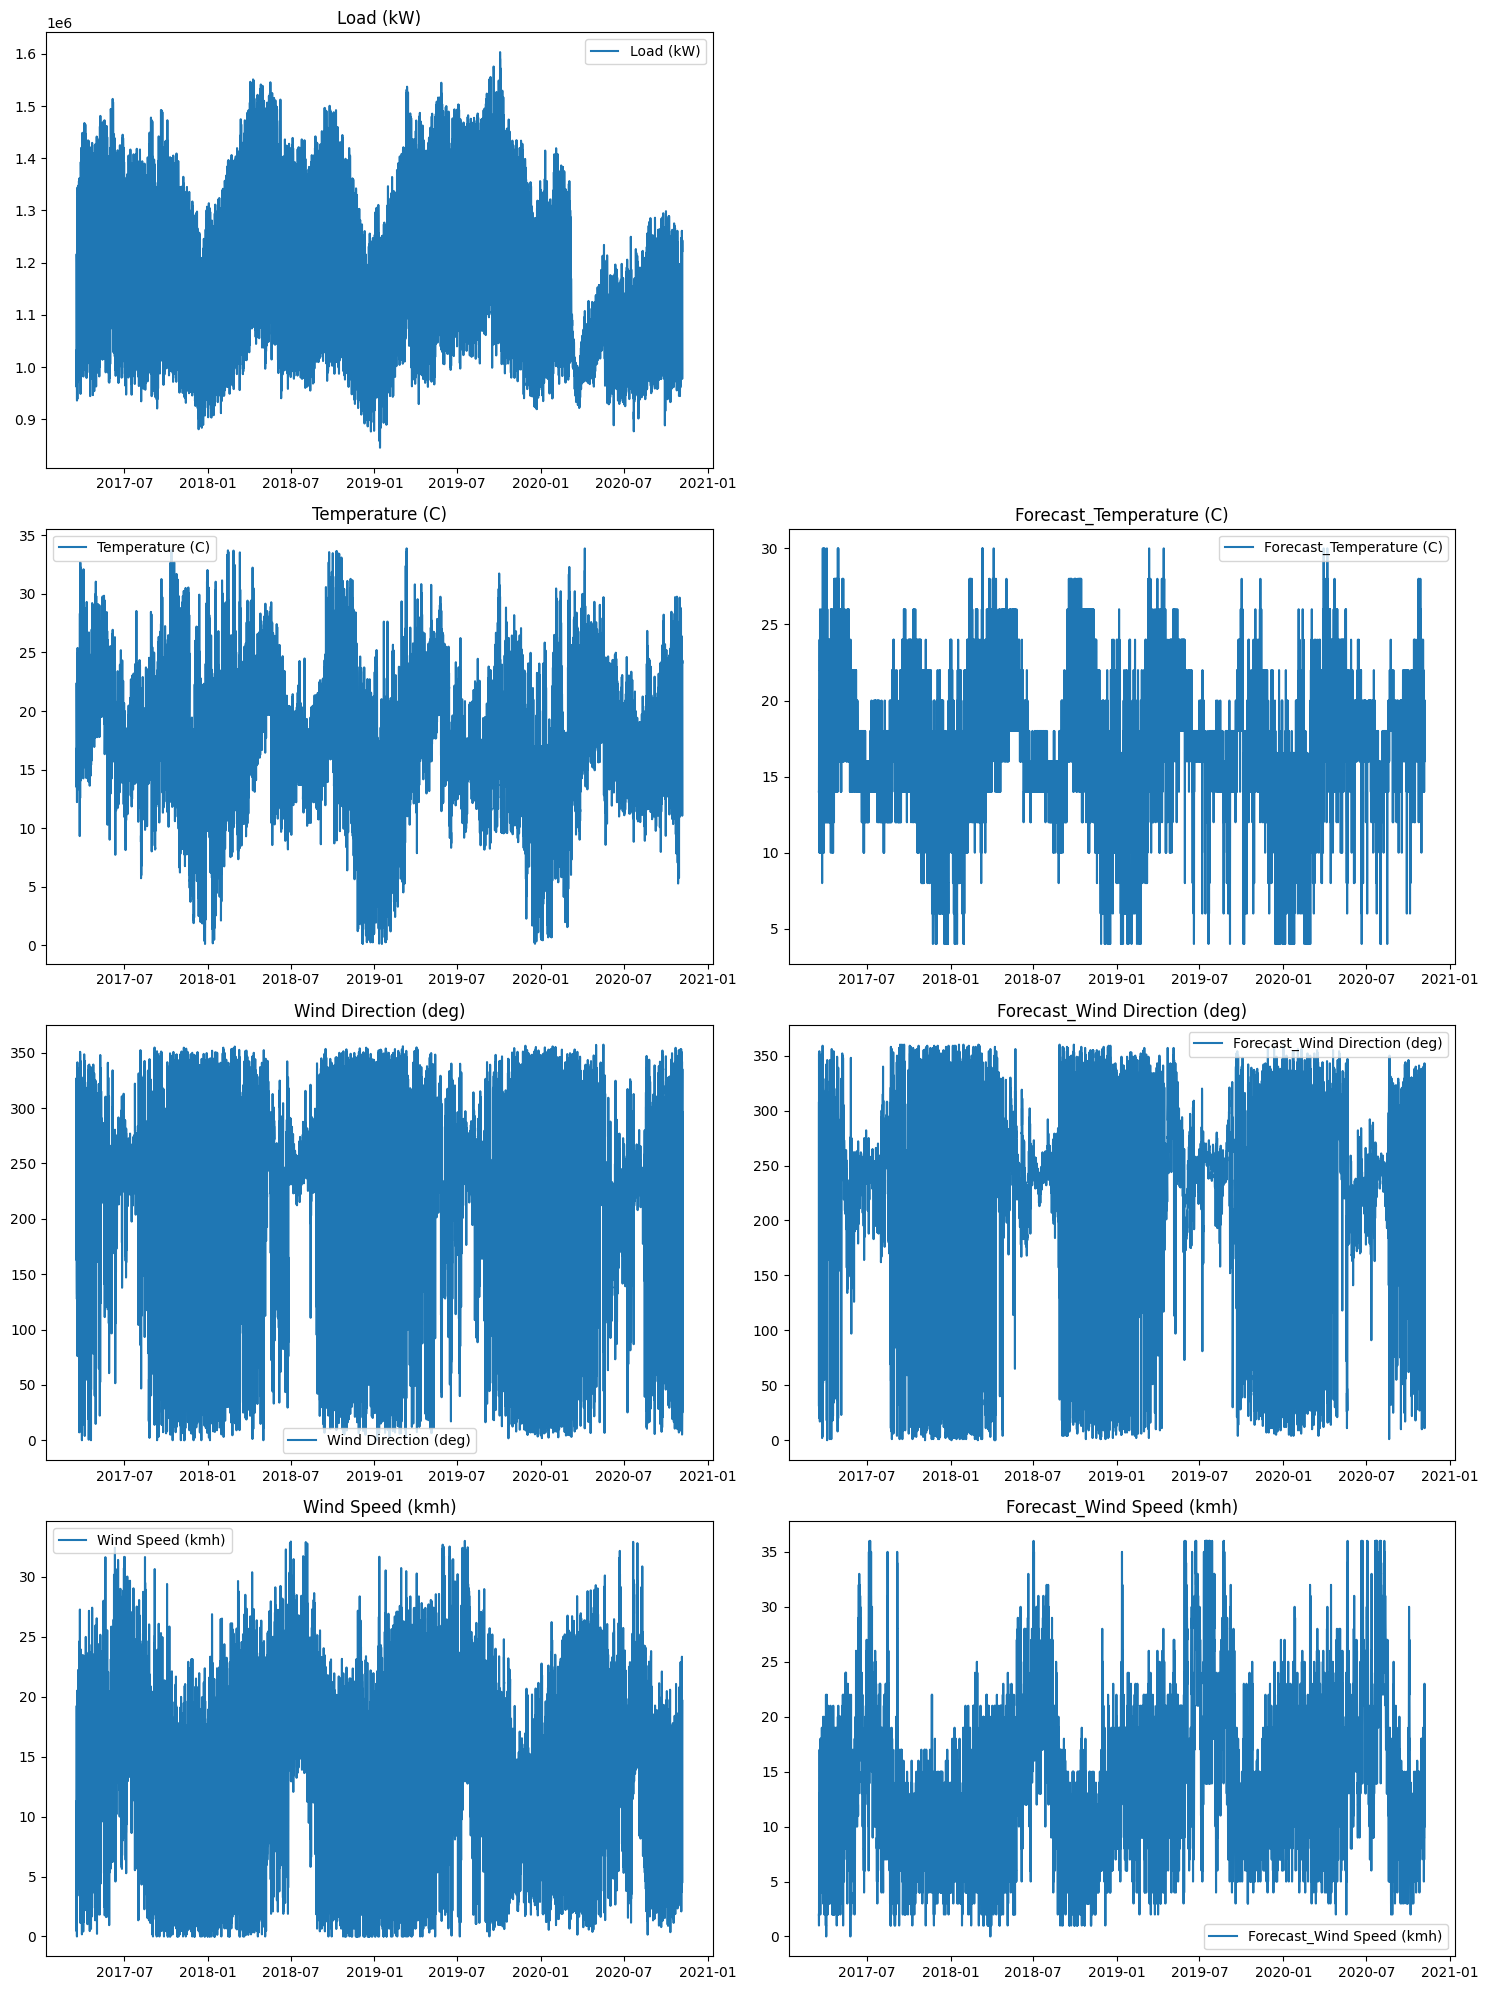

In [5]:
# Identify actual and forecast columns
actual_columns = [col for col in data_df.columns if not col.startswith('Forecast_')]
forecast_columns = [col for col in data_df.columns if col.startswith('Forecast_')]

# Remove 'Forecast_' prefix from forecast columns for matching
forecast_columns = [col.replace('Forecast_', '') for col in forecast_columns]

# Filter only the matching pairs
matching_columns = [col for col in actual_columns if col in forecast_columns]

# Create subplots
n_pairs = len(matching_columns)
fig, axes = plt.subplots(nrows=n_pairs+1, ncols=2, figsize=(15, 5 * (n_pairs+1)))

# First row: Load (kW)
axes[0, 0].plot(data_df.index, data_df['Load (kW)'], label='Load (kW)')
axes[0, 0].set_title('Load (kW)')
axes[0, 0].legend()
axes[0, 1].axis('off')  # Hide the second subplot in the first row

# Subsequent rows: actual and forecast pairs
for i, col in enumerate(matching_columns, start=1):
    axes[i, 0].plot(data_df.index, data_df[col], label=col)
    axes[i, 0].set_title(col)
    axes[i, 0].legend()
    
    forecast_col = 'Forecast_' + col
    axes[i, 1].plot(data_df.index, data_df[forecast_col], label=forecast_col)
    axes[i, 1].set_title(forecast_col)
    axes[i, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

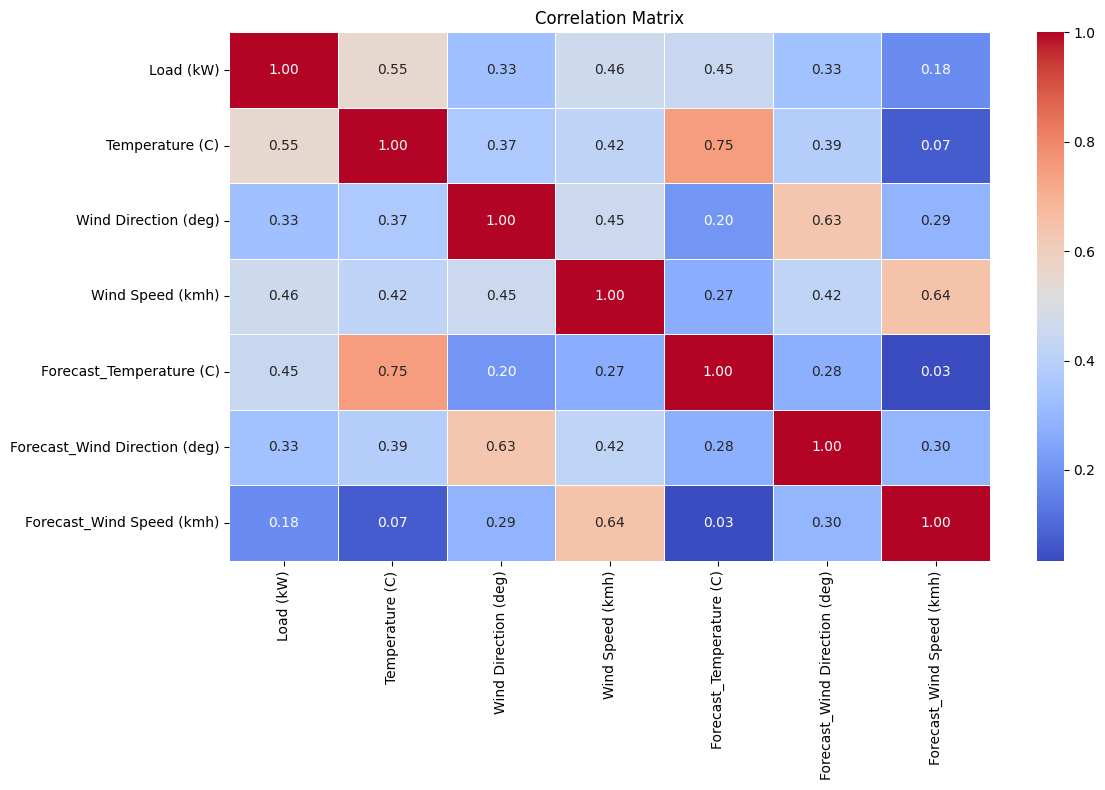

In [6]:
# Compute and plot correlation matrix
correlation_matrix = data_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('../report/figures/columns_correlation_matrix.png')
plt.show()

In [7]:
# Extract the correlation values for the "load" column
load_correlations = correlation_matrix['Load (kW)']

# Sort the correlations in descending order
sorted_correlations = load_correlations.sort_values(ascending=False)

# Display the columns with their corresponding correlation coefficients
print(sorted_correlations)

Load (kW)                        1.000000
Temperature (C)                  0.554738
Wind Speed (kmh)                 0.463365
Forecast_Temperature (C)         0.445274
Forecast_Wind Direction (deg)    0.333587
Wind Direction (deg)             0.328731
Forecast_Wind Speed (kmh)        0.178983
Name: Load (kW), dtype: float64


In [8]:
threshold = 0.15
most_correlated_columns = sorted_correlations[sorted_correlations > threshold].index.tolist()

# Search for patterns in Load (kW) variable


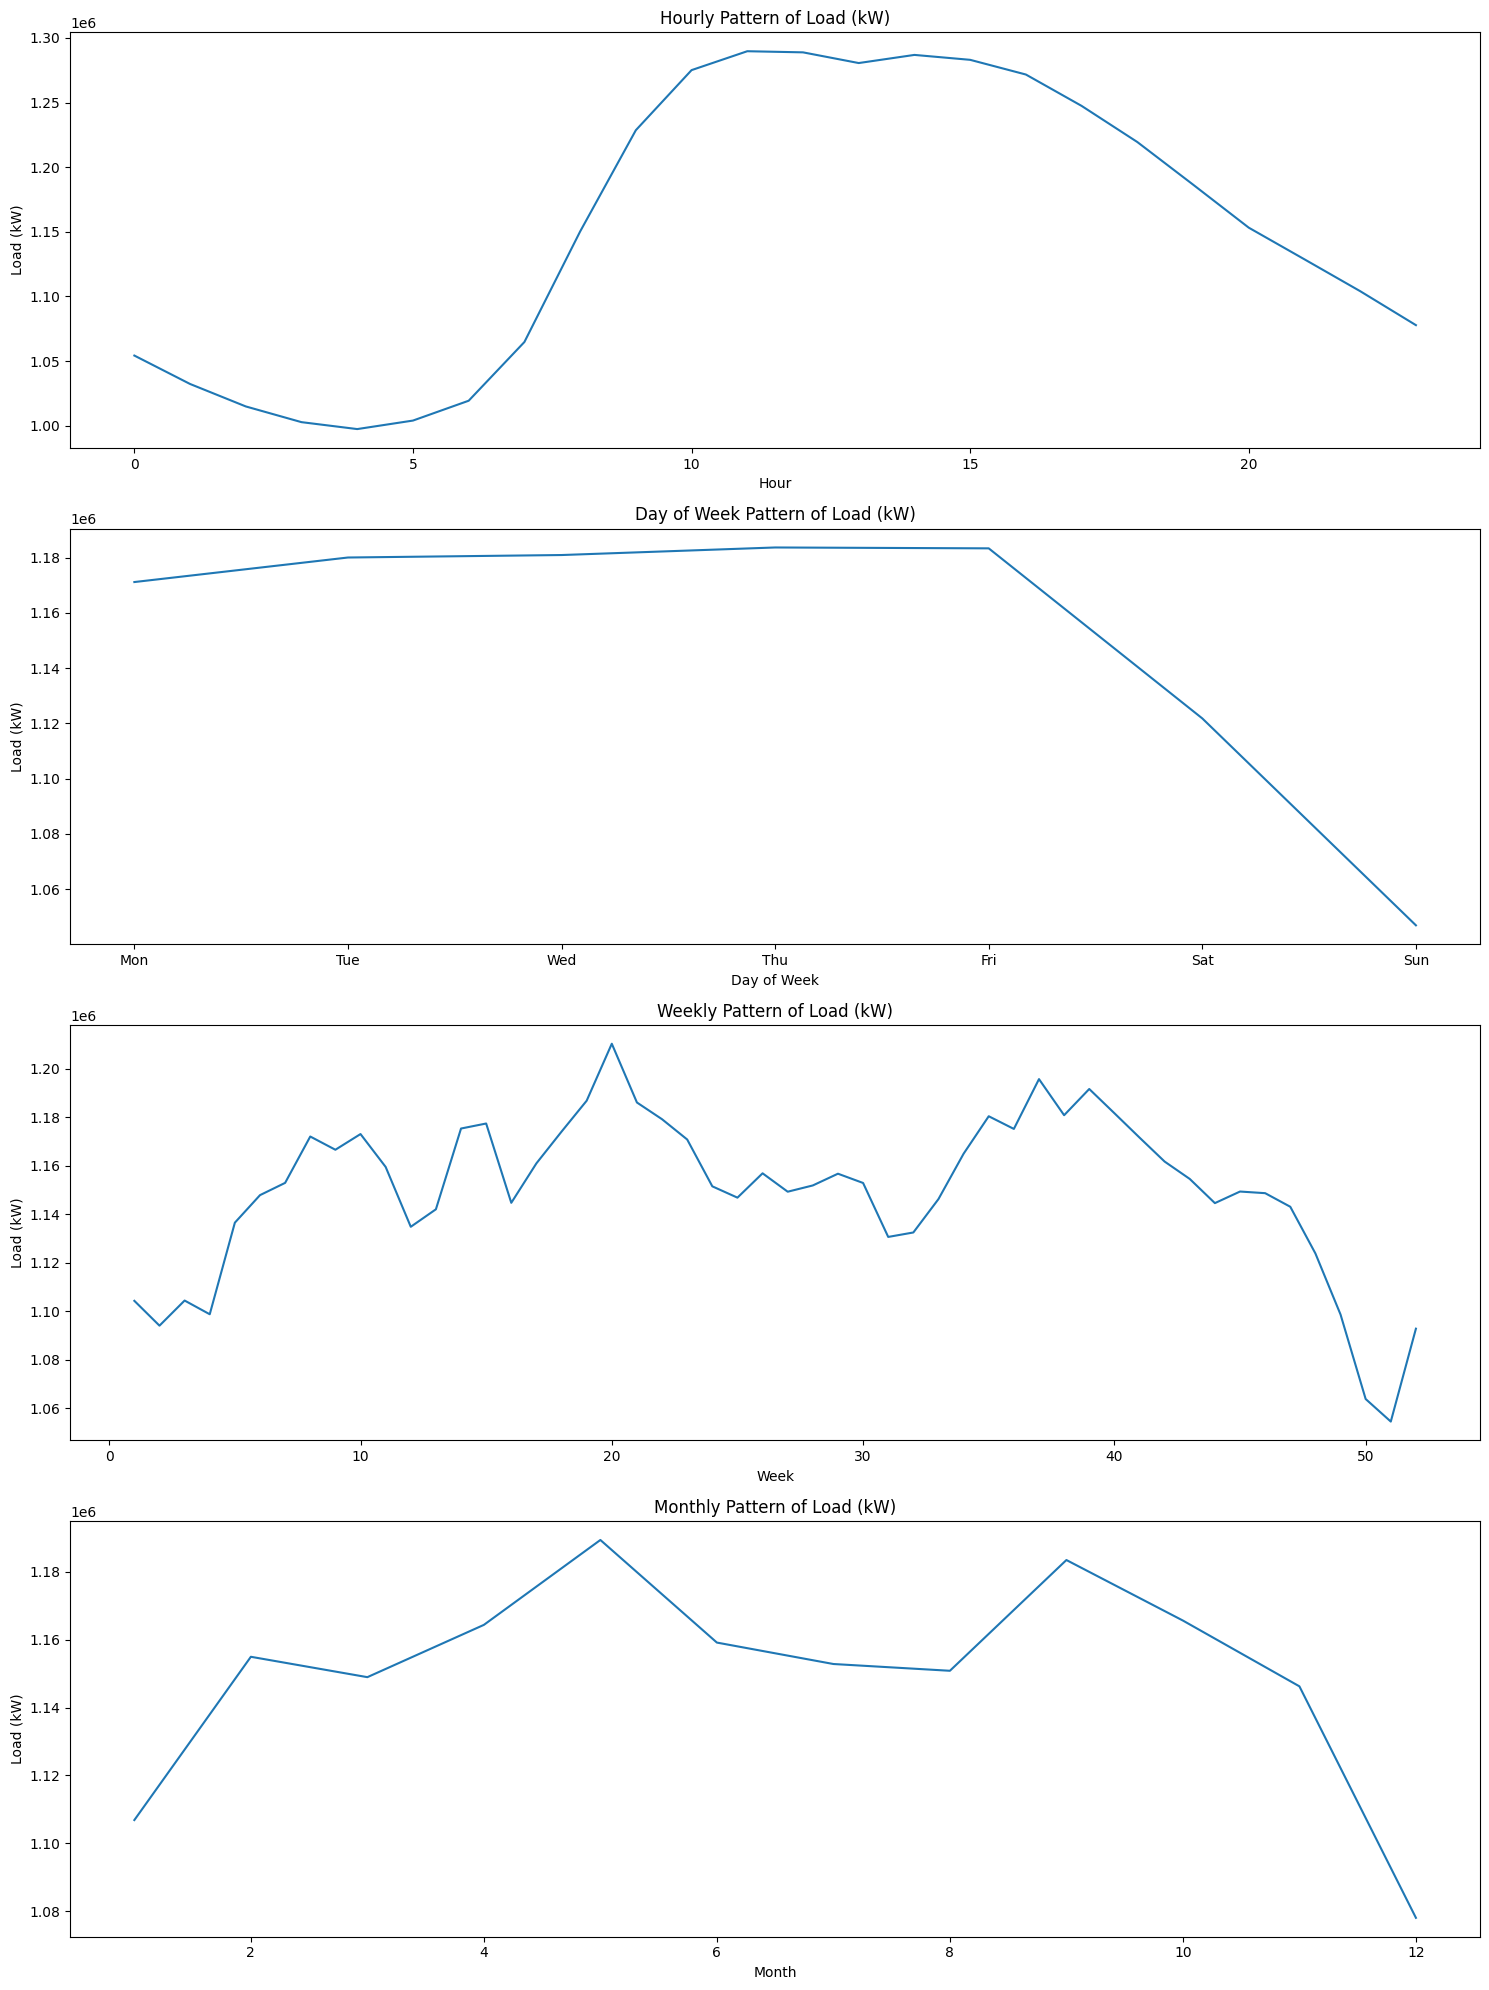

In [9]:

# Function to determine season
def get_season(date):
    Y = 2000  # dummy leap year to get same day index for each year
    seasons = [('winter', (pd.Timestamp(f'{Y}-12-21'), pd.Timestamp(f'{Y+1}-03-20'))),
               ('spring', (pd.Timestamp(f'{Y}-03-21'), pd.Timestamp(f'{Y}-06-20'))),
               ('summer', (pd.Timestamp(f'{Y}-06-21'), pd.Timestamp(f'{Y}-09-22'))),
               ('fall', (pd.Timestamp(f'{Y}-09-23'), pd.Timestamp(f'{Y}-12-20')))]
    if isinstance(date, pd.DatetimeIndex):
        date = date.map(lambda x: x.replace(year=Y))
    else:
        date = date.replace(year=Y)
    for season, (start, end) in seasons:
        if start <= date <= end:
            return season
    return 'winter'  # default

# Add grouping columns
data_df['Hour'] = data_df.index.hour
data_df['Week'] = data_df.index.isocalendar().week
data_df['Month'] = data_df.index.month
data_df['Season'] = data_df.index.map(get_season)
data_df['Day of Week'] = data_df.index.dayofweek

# List of features to plot
features = ['Load (kW)']
            # 'Temperature (C)', 'Forecast_Temperature (C)', 
            # 'Pressure_kpa', 'Forecast_Pressure_kpa', 'Cloud Cover (%)', 
            # 'Forecast_Cloud Cover (%)']

# Plotting function
def plot_patterns(df, feature):
    fig, axes = plt.subplots(4, 1, figsize=(15, 20))
    
    # Hourly pattern
    hourly_data = df.groupby('Hour')[feature].mean()
    sns.lineplot(ax=axes[0], data=hourly_data)
    axes[0].set_title(f'Hourly Pattern of {feature}')
    
    # Day of Week pattern
    dayofweek_data = df.groupby('Day of Week')[feature].mean()
    sns.lineplot(ax=axes[1], data=dayofweek_data)
    axes[1].set_title(f'Day of Week Pattern of {feature}')
    axes[1].set_xticks(range(7))
    axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    
    # Weekly pattern
    weekly_data = df.groupby('Week')[feature].mean()
    sns.lineplot(ax=axes[2], data=weekly_data)
    axes[2].set_title(f'Weekly Pattern of {feature}')
    
    # Monthly pattern
    monthly_data = df.groupby('Month')[feature].mean()
    sns.lineplot(ax=axes[3], data=monthly_data)
    axes[3].set_title(f'Monthly Pattern of {feature}')
    
    plt.tight_layout()
    plt.show()

def plot_patterns_for_weather_features(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Create a figure with 2 subplots side by side
    
    # Hourly pattern
    hourly_data = df.groupby('Hour')[feature].mean()
    sns.lineplot(ax=axes[0], data=hourly_data)
    axes[0].set_title(f'Hourly Pattern of {feature}')
    axes[0].set_xlabel('Hour')
    axes[0].set_ylabel('Mean Value')
    
    # Monthly pattern
    monthly_data = df.groupby('Month')[feature].mean()
    sns.lineplot(ax=axes[1], data=monthly_data)
    axes[1].set_title(f'Monthly Pattern of {feature}')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Mean Value')
    
    plt.tight_layout()
    plt.show()


# Plot patterns for each feature
for feature in features:
    plot_patterns(data_df, feature)

In [10]:
data_df.columns

Index(['Load (kW)', 'Temperature (C)', 'Wind Direction (deg)',
       'Wind Speed (kmh)', 'Forecast_Temperature (C)',
       'Forecast_Wind Direction (deg)', 'Forecast_Wind Speed (kmh)', 'Hour',
       'Week', 'Month', 'Season', 'Day of Week'],
      dtype='object')

# Search for patterns in weather variables


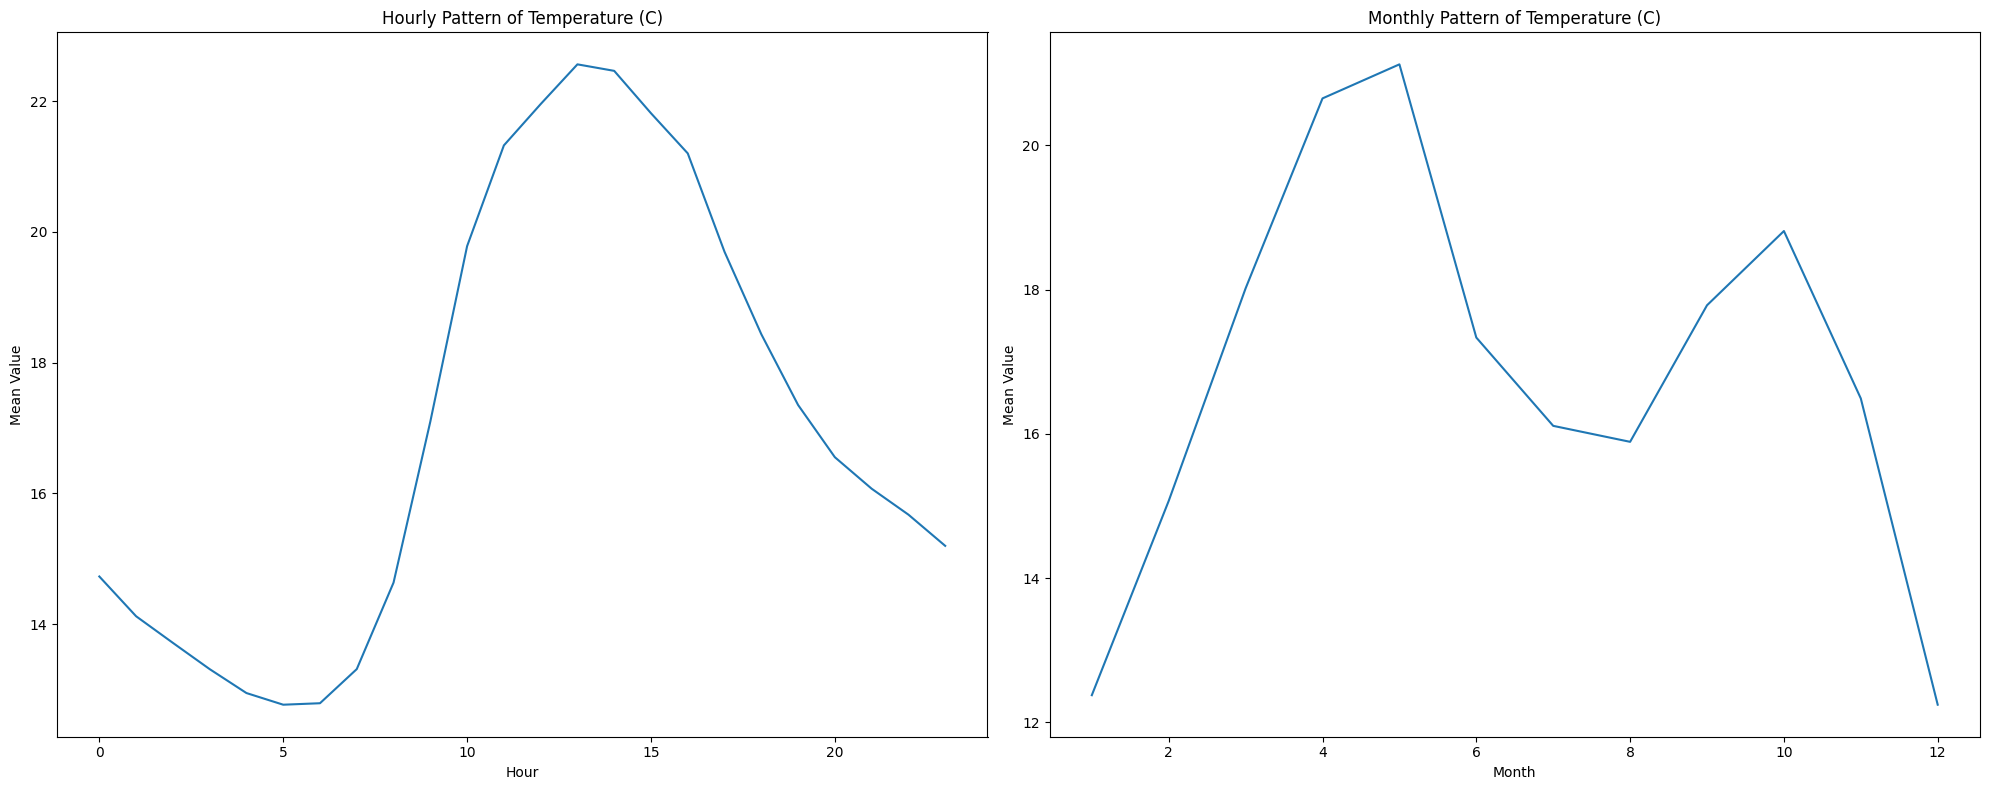

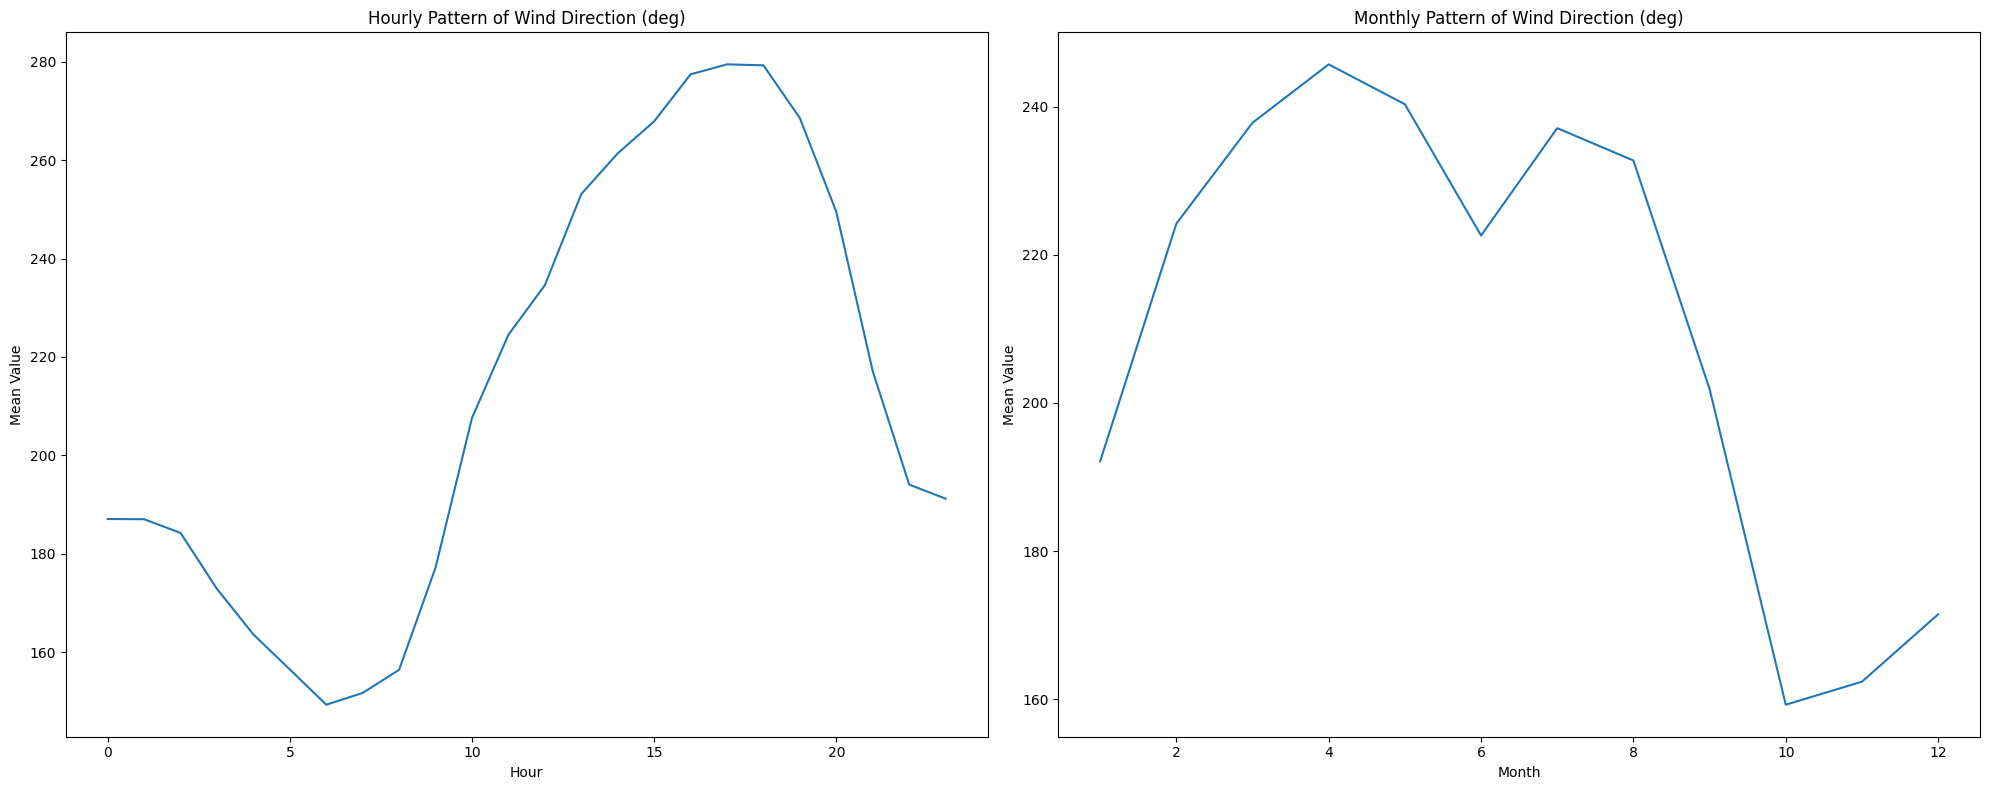

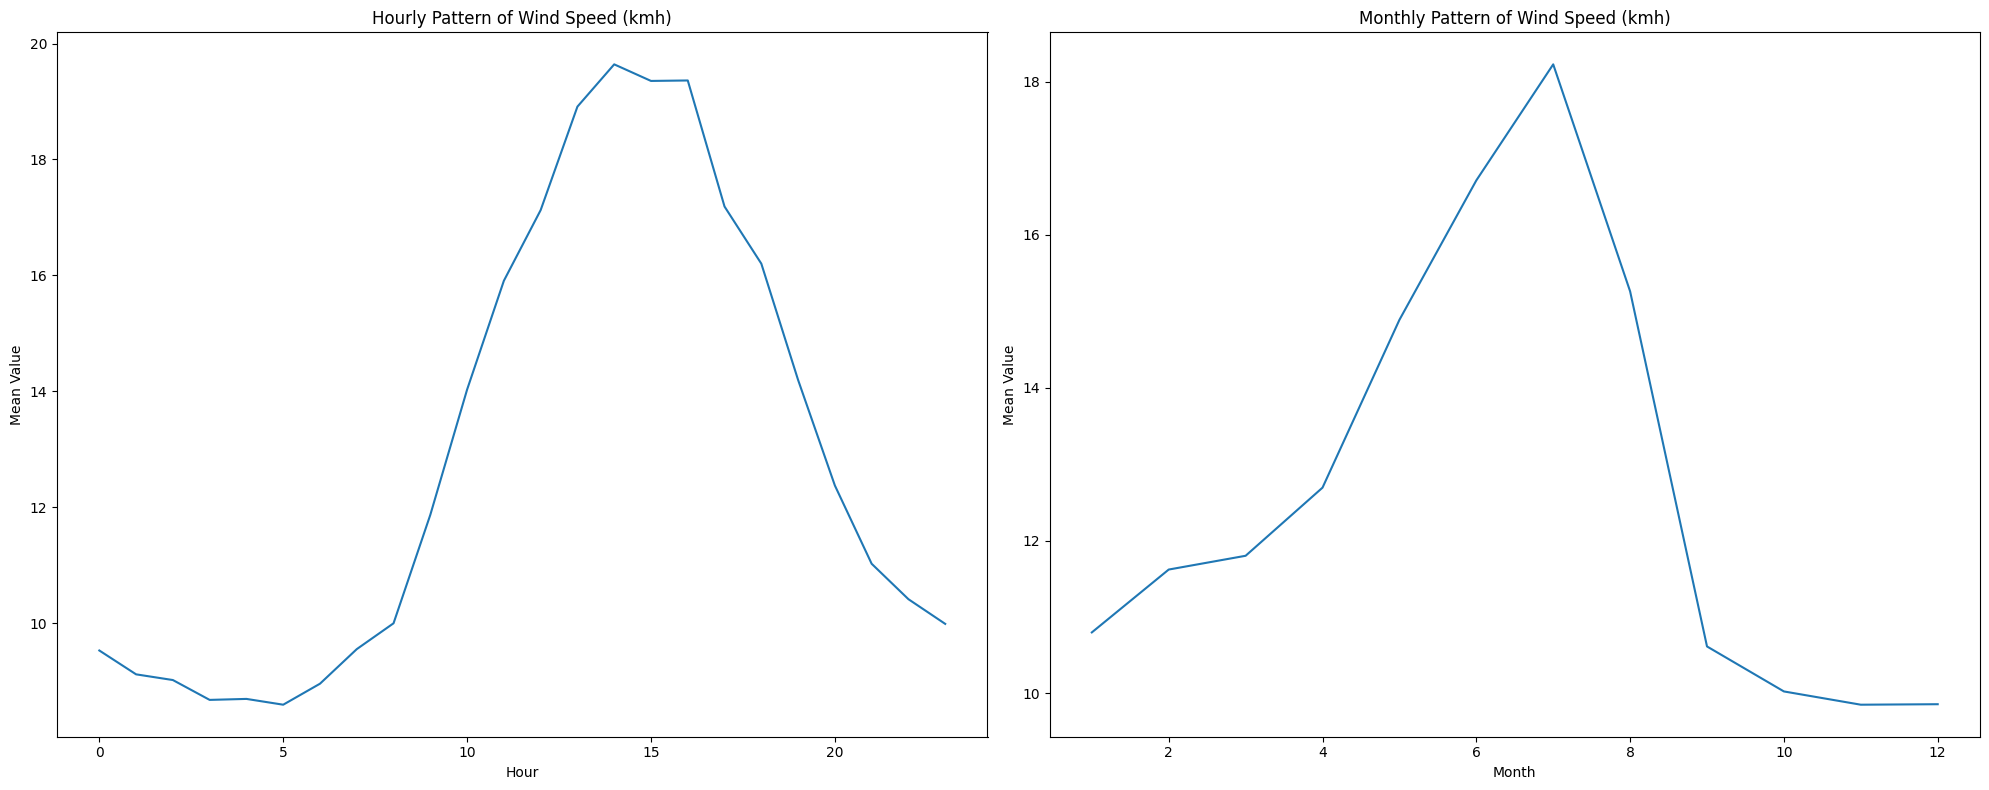

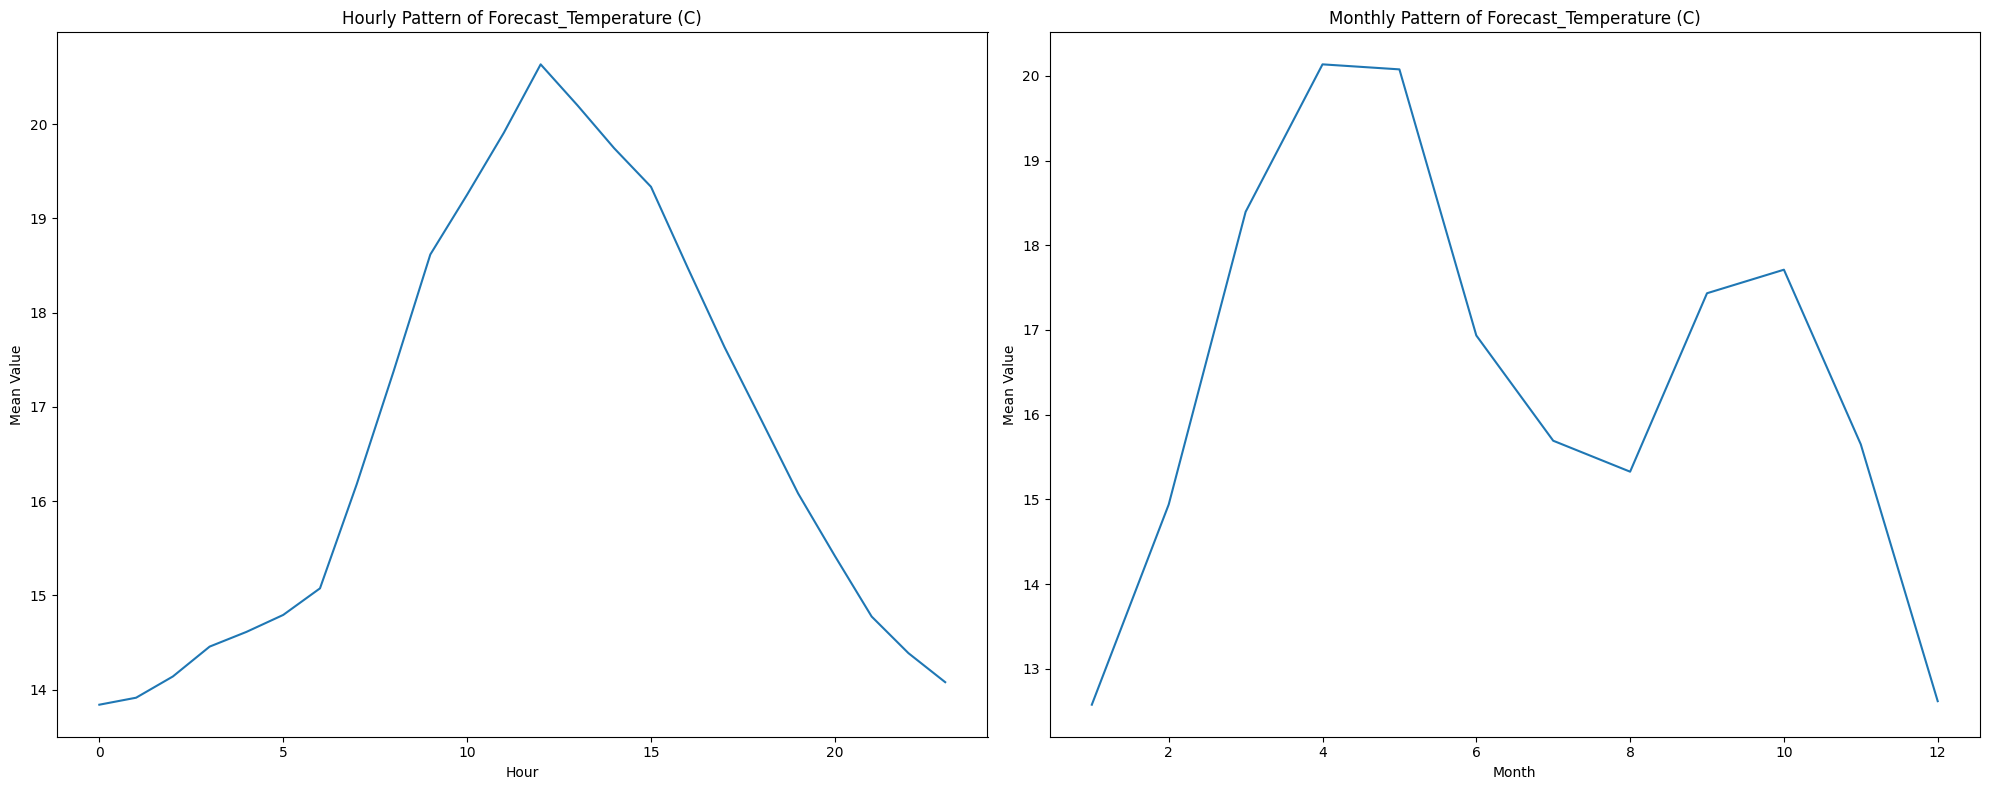

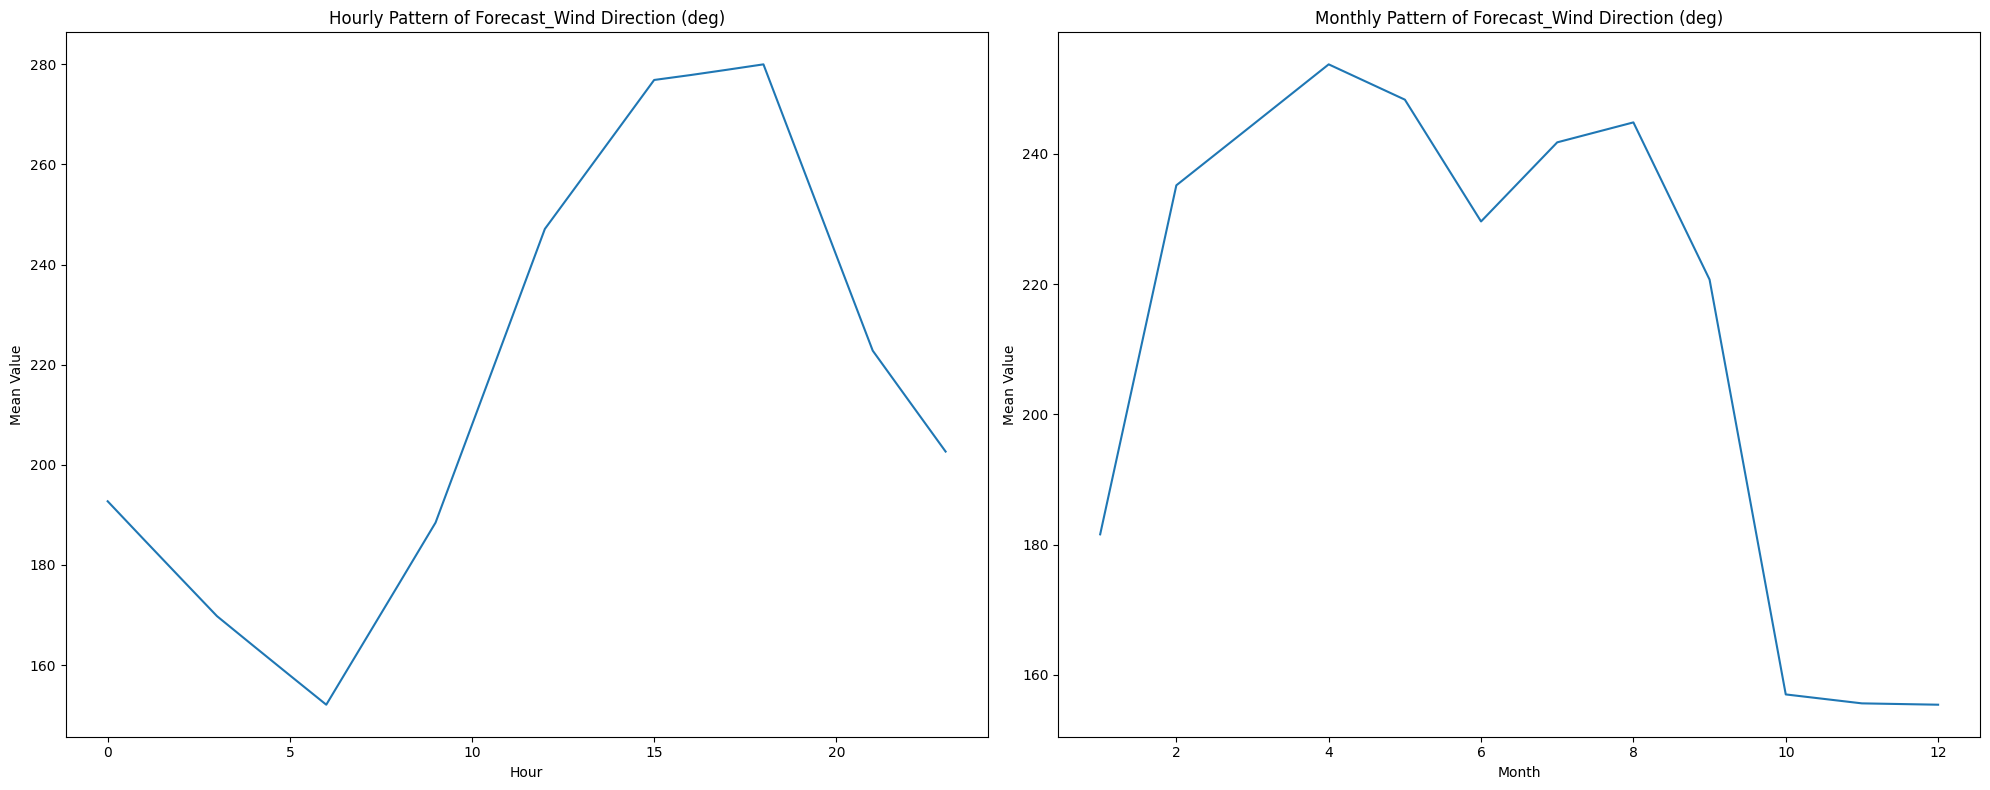

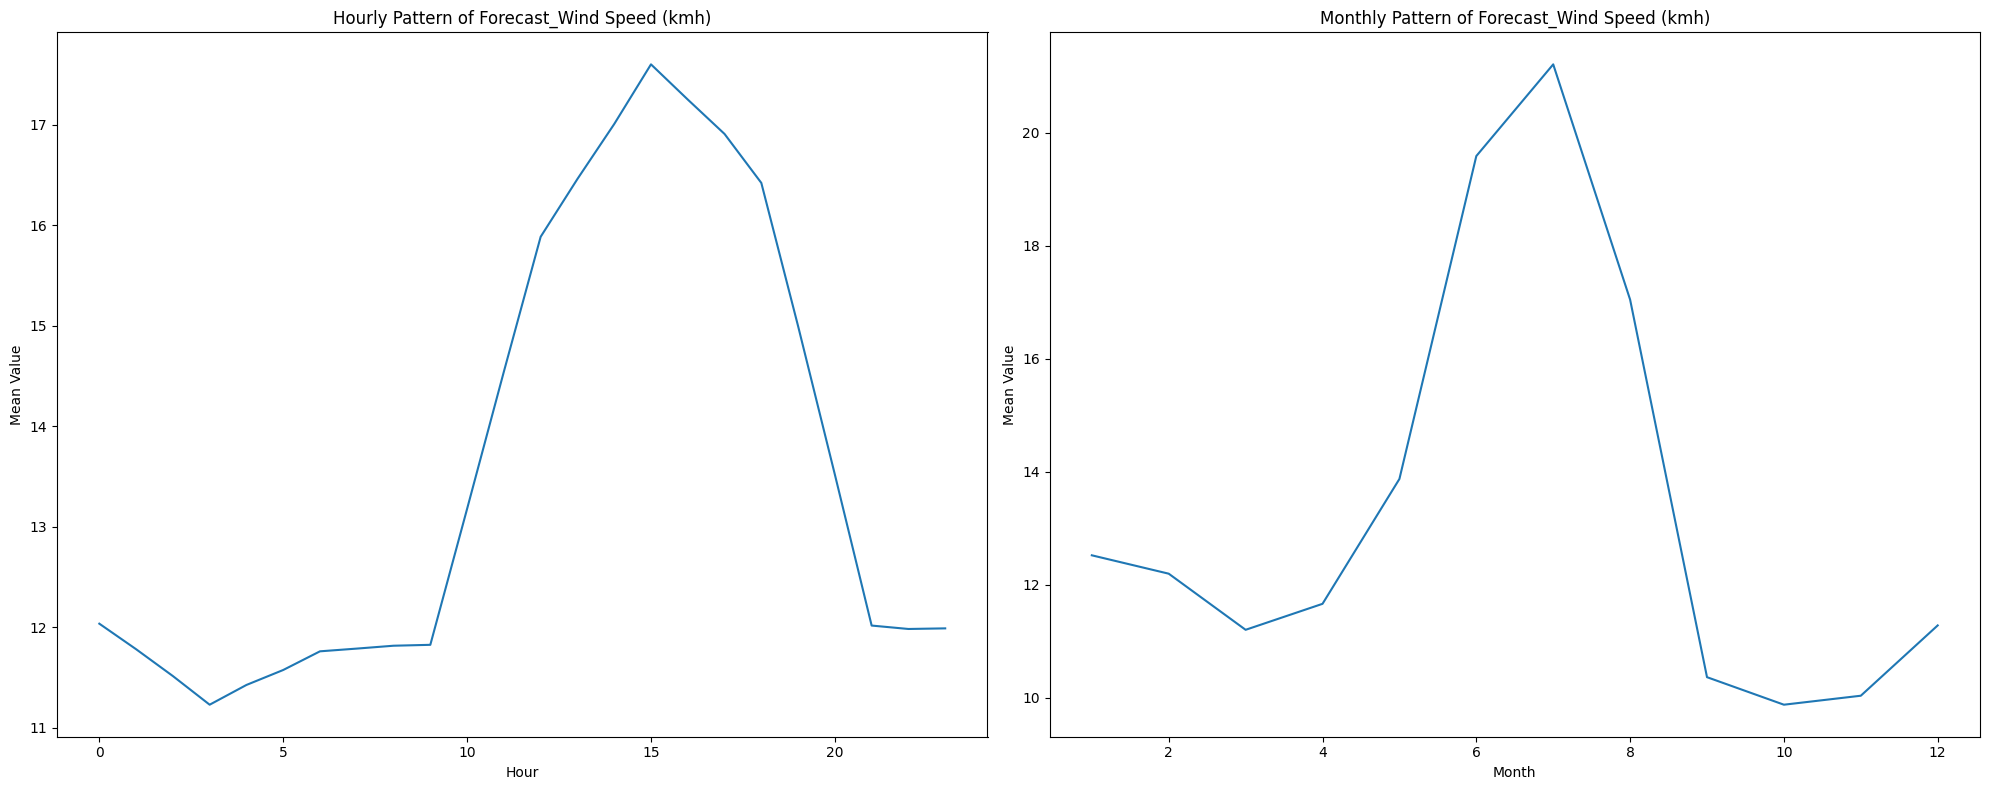

In [14]:

# # List of features to plot
weather_features = [
       'Temperature (C)', 'Wind Direction (deg)', 'Wind Speed (kmh)',
       'Forecast_Temperature (C)', 'Forecast_Wind Direction (deg)',
       'Forecast_Wind Speed (kmh)']

# # Plot patterns for each feature
for weather_feature in weather_features:
    plot_patterns_for_weather_features(df= data_df, feature=weather_feature)

### Continue the analysis by keeping only the most correlated features

In [15]:
data_df = data_df[most_correlated_columns]
data_df

,Load (kW),Temperature (C),Wind Speed (kmh),Forecast_Temperature (C),Forecast_Wind Direction (deg),Wind Direction (deg),Forecast_Wind Speed (kmh)
Time,,,,,,,
2017-03-18 00:00:00,1.031472e+06,16.764386,6.253750,14.0,307,285.250000,2.0
2017-03-18 01:00:00,1.007206e+06,15.729386,9.205000,14.0,215,285.000000,2.0
2017-03-18 02:00:00,9.861084e+05,15.816886,11.283750,14.0,123,316.000000,1.0
2017-03-18 03:00:00,9.707610e+05,15.919386,7.168750,14.0,31,327.000000,1.0
2017-03-18 04:00:00,9.622584e+05,15.769386,0.780000,14.0,138,282.250000,1.0
...,...,...,...,...,...,...,...
2020-11-06 11:00:00,1.242830e+06,21.299386,8.280000,18.0,264,335.250000,11.0
2020-11-06 12:00:00,1.239480e+06,22.419386,11.466250,20.0,332,261.250000,12.0
2020-11-06 13:00:00,1.234773e+06,22.971886,14.507500,20.0,328,296.250000,14.0


# Comparison between actual and forecasted weather features

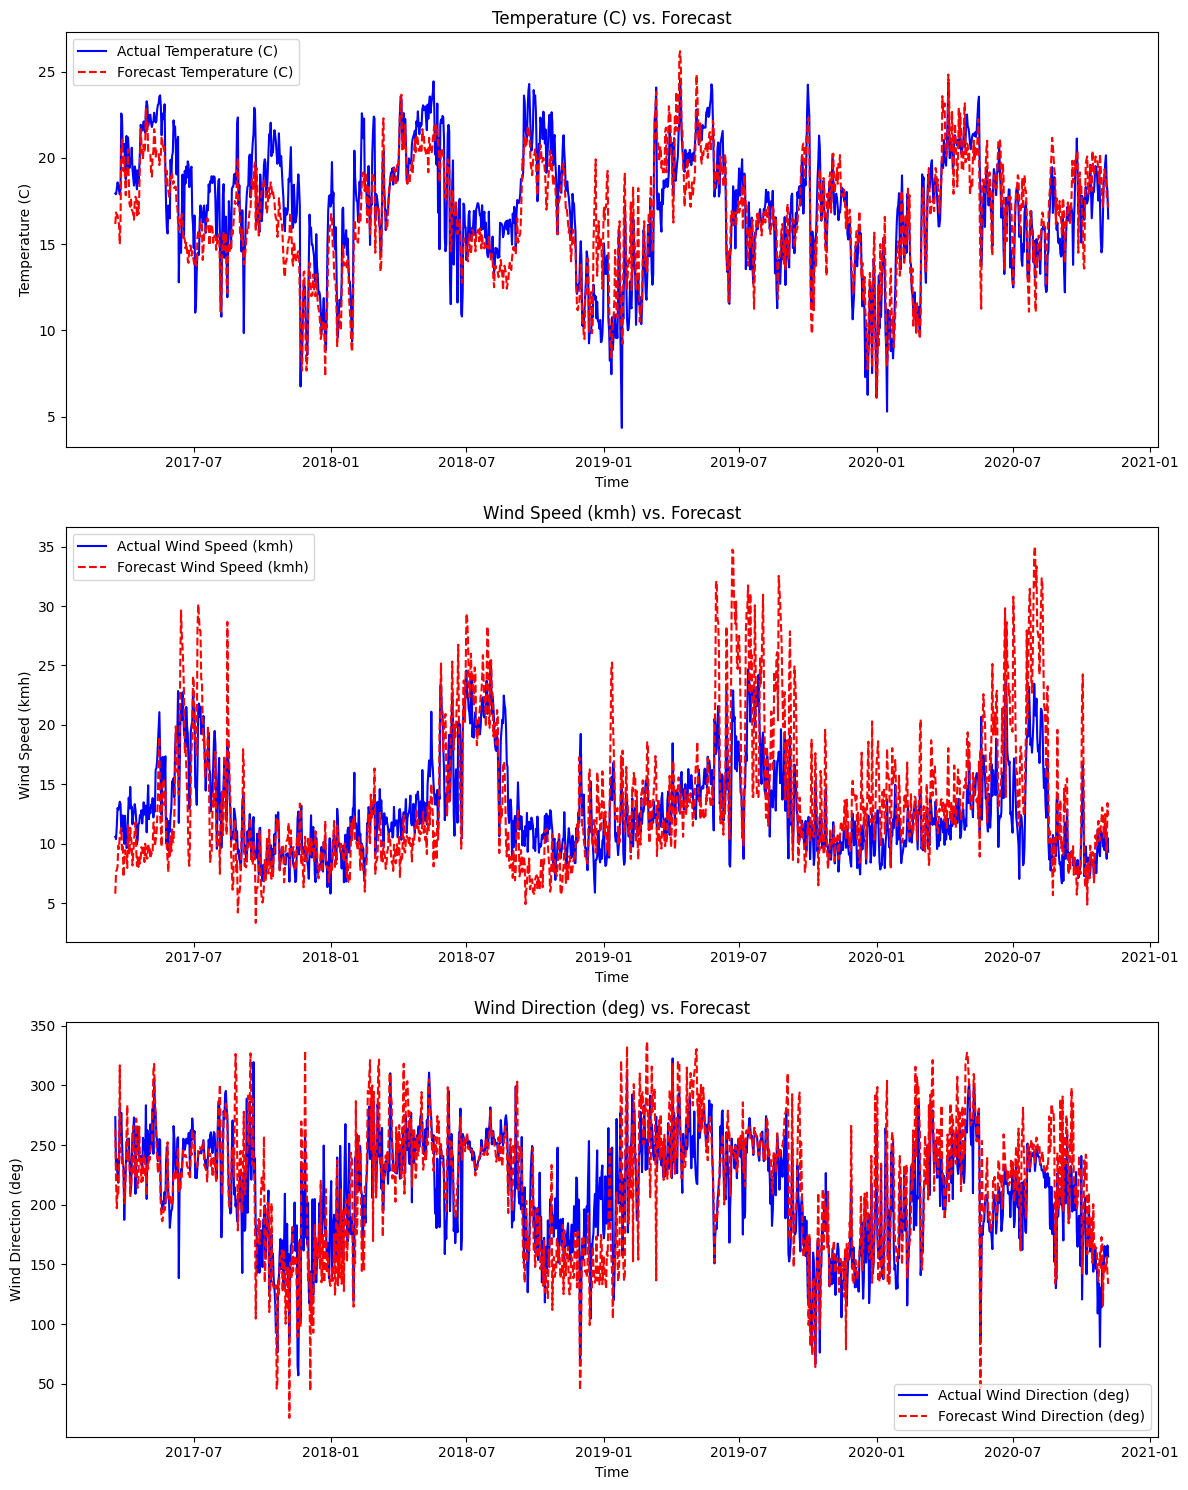

In [19]:
daily_data = data_df.resample('D').mean()

plot_actual_vs_forecast(daily_data)

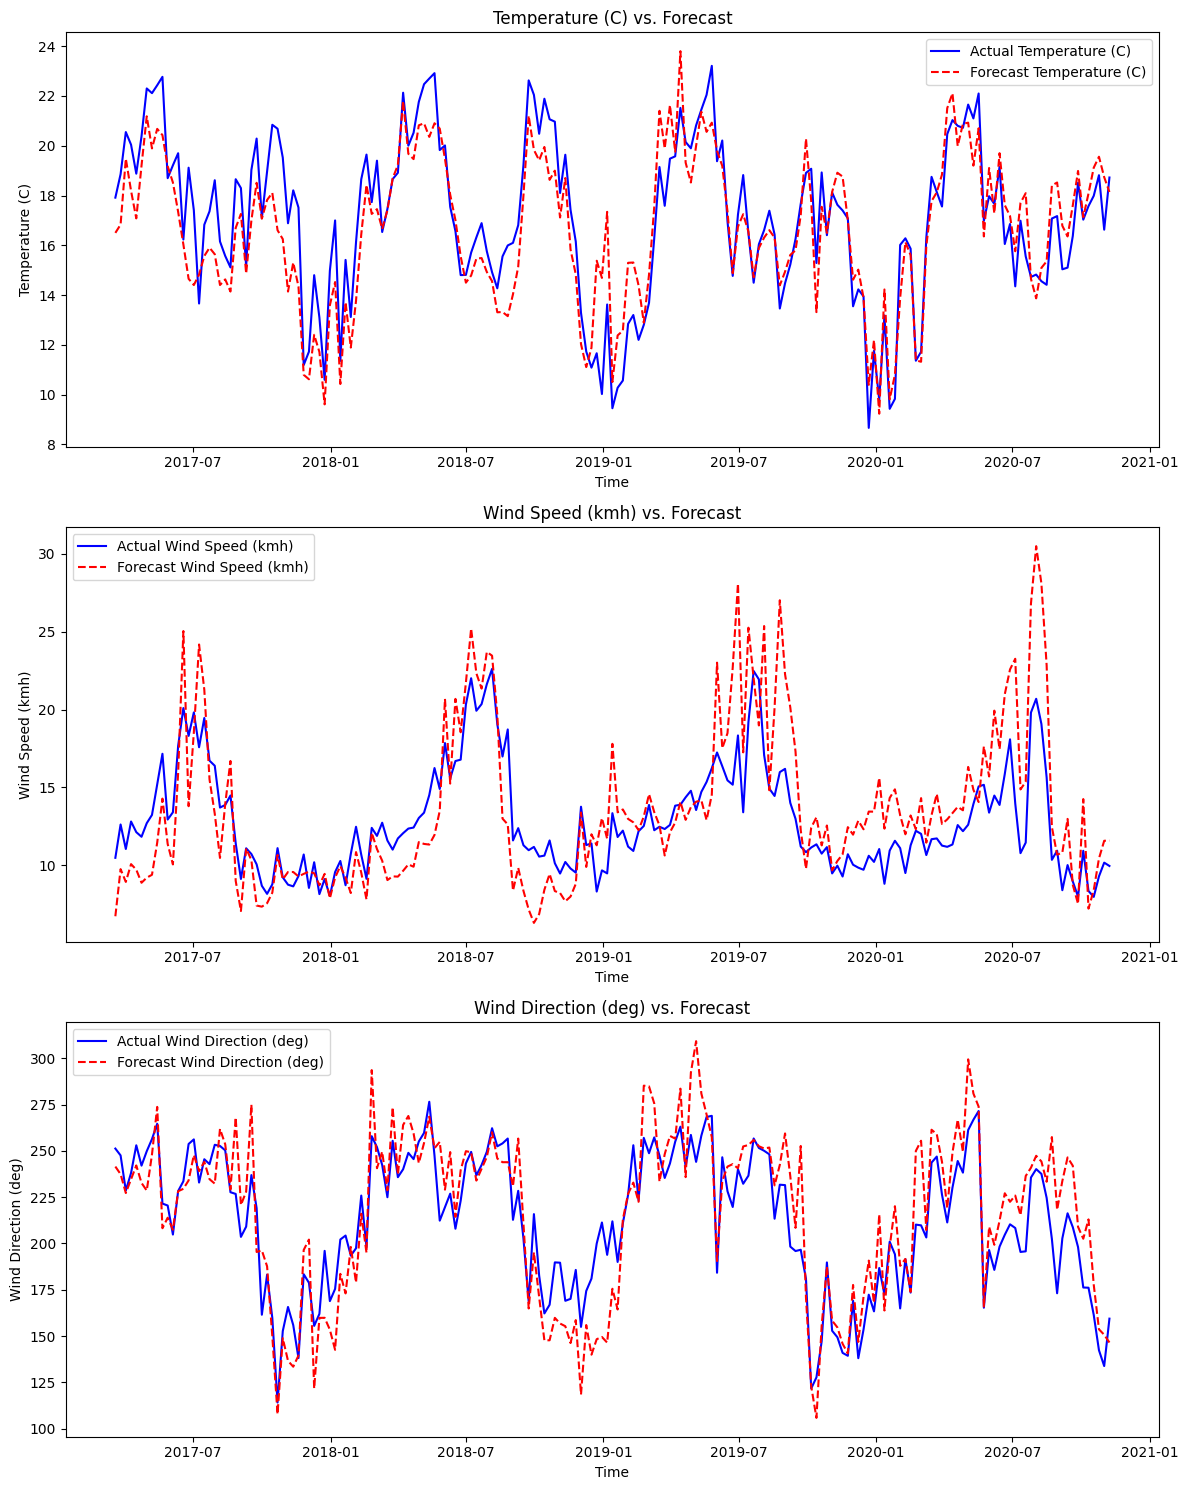

In [20]:
#daily_data = data_df.resample('D').mean()
weekly_data = data_df.resample('W').mean()

plot_actual_vs_forecast(weekly_data)

In [ ]:
plot_actual_vs_forecast(data_df)

/var/folders/lr/mgr68cn54jd65hblp9mytcym0000gn/T/ipykernel_6264/2342236743.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data_df.resample('M').mean()


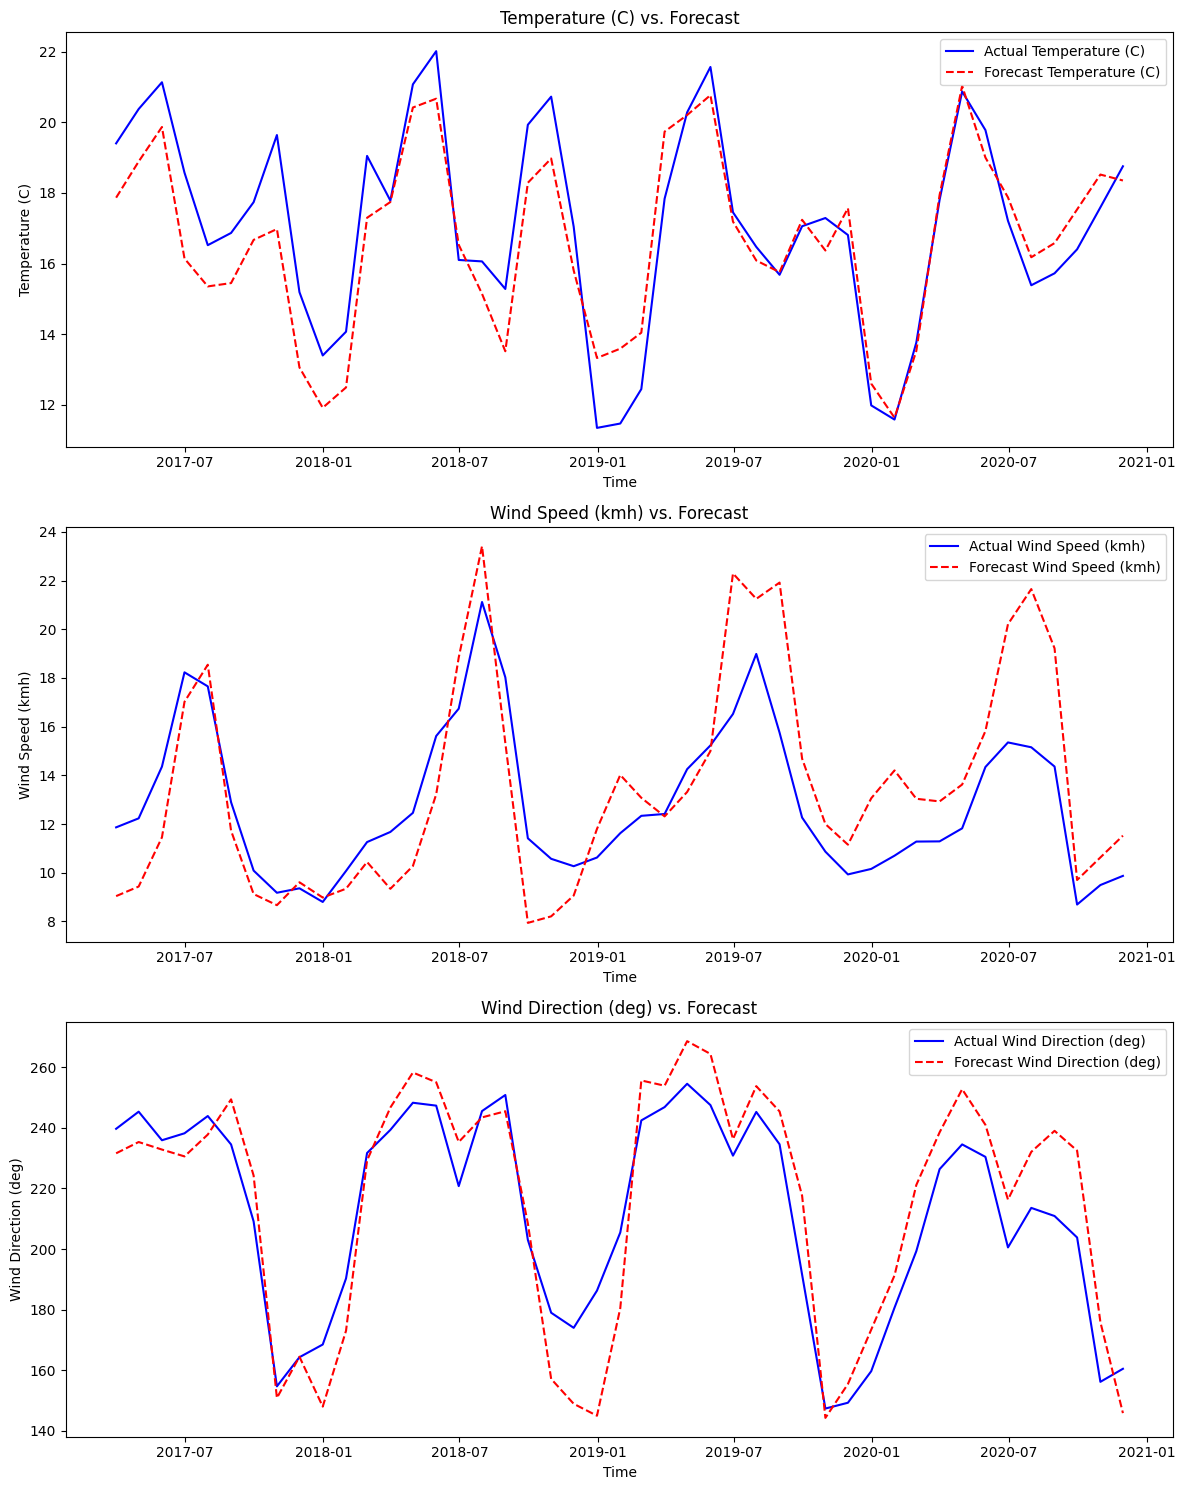

In [21]:
monthly_data = data_df.resample('M').mean()

plot_actual_vs_forecast(monthly_data)